In [1]:
import pandas as pd #dataframe handle
import numpy as np #computation functions
import matplotlib.pyplot as plt #plotting data
import seaborn as sns # seaborn is again a plotting library but with advanced functions
import plotly.express as px #plotty is used to draw multiple graphs
%matplotlib inline 
#used to plot and store outputs right after the code in the notebook

In [2]:
train = pd.read_csv("train.csv").set_index('PassengerId')
test = pd.read_csv("test.csv").set_index('PassengerId')

In [3]:
df = pd.concat([train,test],axis=0,sort=False)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [5]:
df.describe()
#insights = mean is 33 and median is 14 so outliers are there in this data!

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [6]:
df.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

# Column - "**Survived**"

In [7]:
df.Survived.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [8]:
round((((df[df.Survived==1].SibSp != 0).sum()/342)*100),2) #38% of passenger who survived had siblings

38.6

In [9]:
round((((df[df.Survived==0].SibSp != 0).sum()/549)*100),2) #27% of passenger who didnt survived had siblings

27.5

In [10]:
round((((df[df.Survived==1].Parch != 0).sum()/342)*100),2) #38% of passenger who survived had their parents or children

31.87

In [11]:
round((((df[df.Survived==0].Parch != 0).sum()/549)*100),2) #18% of passenger who didnt survived had their parents or children

18.94

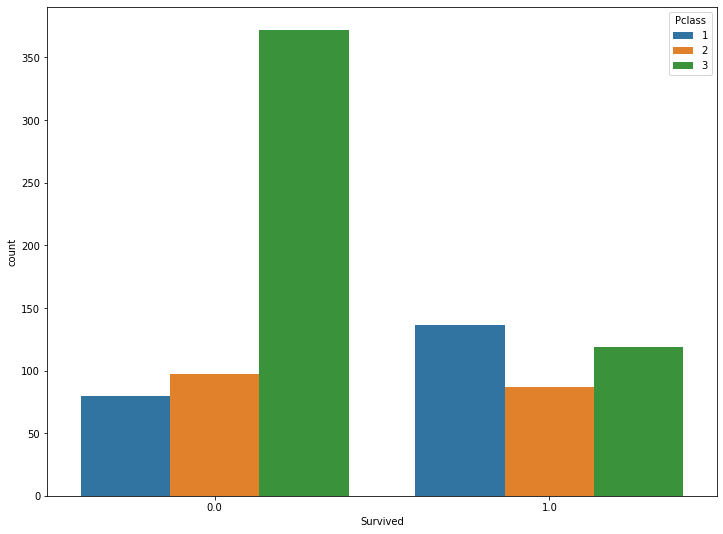

In [12]:
plt.figure(figsize=(12,9))
sns.countplot(x=df.Survived,hue=df.Pclass)
#the passengers who were in 3rd class didnt survived almost and the pass in  1st class almost survived

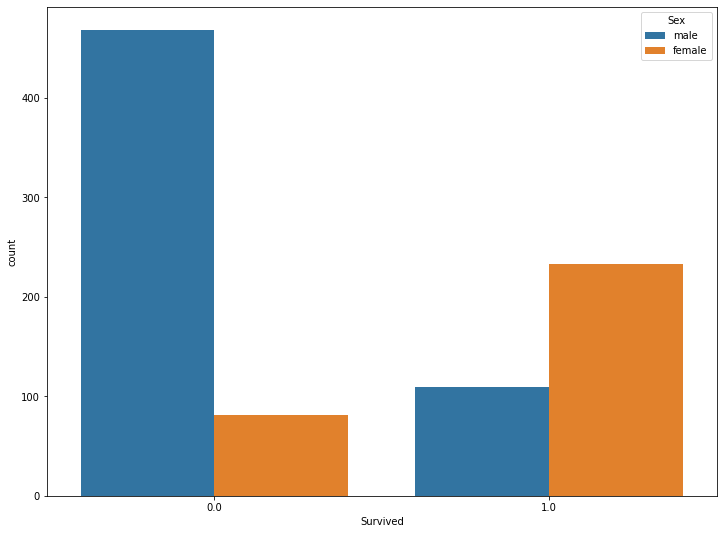

In [13]:
plt.figure(figsize=(12,9))
sns.countplot(x=df.Survived,hue=df.Sex)
#female survived more than males

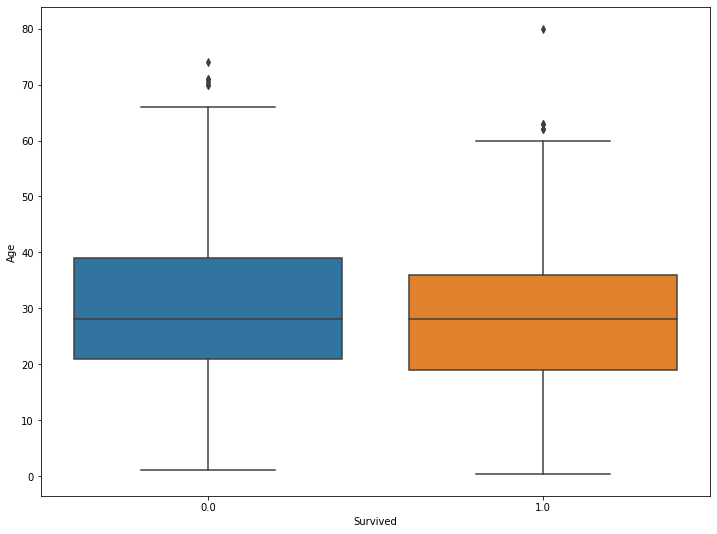

In [14]:
plt.figure(figsize=(12,9))
sns.boxplot(x=df.Survived,y=df.Age)
#Not much difference

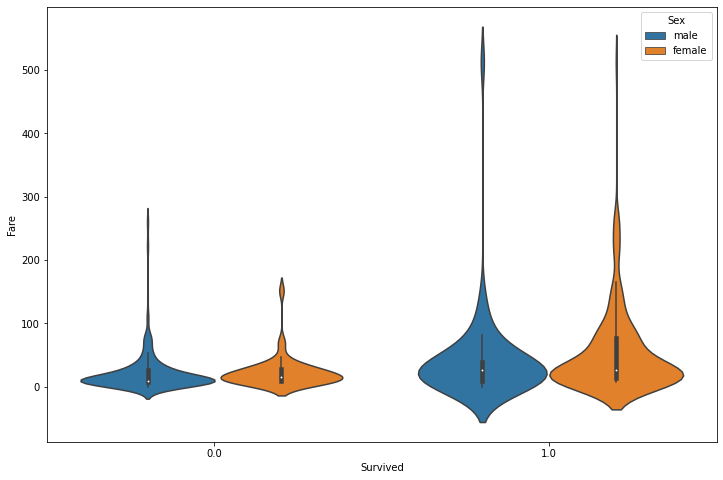

In [15]:
plt.figure(figsize=(12,8))
sns.violinplot(x=df.Survived,y=df.Fare,hue=df.Sex)
#Its seen that as the fare increases the casualities decreases

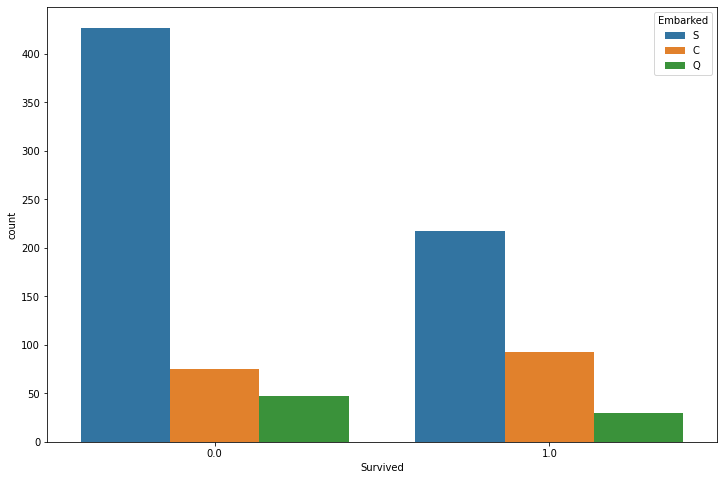

In [16]:
plt.figure(figsize=(12,8))
sns.countplot(x=df.Survived,hue=df.Embarked)
#most of the people were from Southampton

# **`Pclass`**

In [17]:
df.groupby('Pclass').mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,39.159930,0.436533,0.365325,87.508992
2,0.472826,29.506705,0.393502,0.368231,21.179196
3,0.242363,24.816367,0.568406,0.400564,13.302889


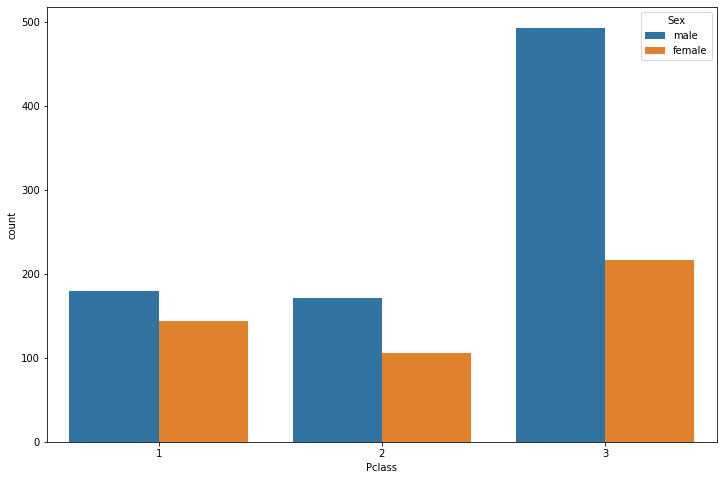

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(x=df.Pclass,hue=df.Sex)
#More no. of males were in 3rdclass

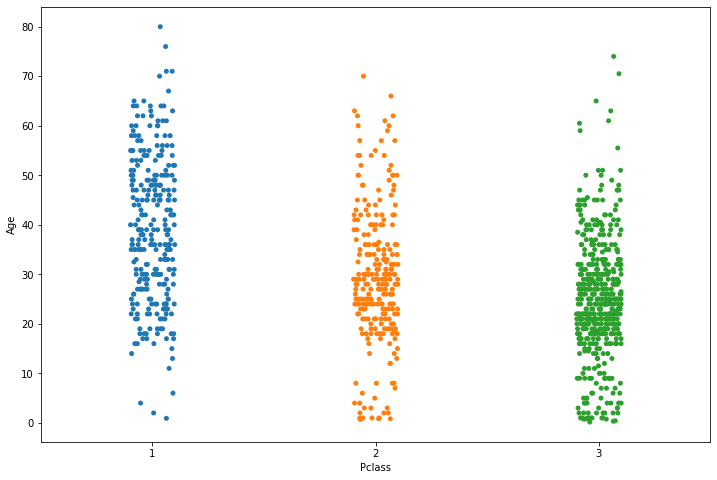

In [19]:
plt.figure(figsize=(12,8))
sns.stripplot(x=df.Pclass,y=df.Age)
#elder people more in class 1

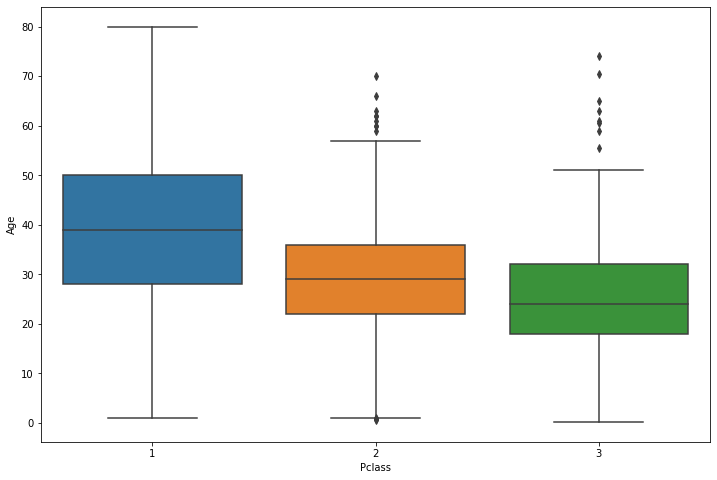

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df.Pclass,y=df.Age)
#better statistic here we can clearly see

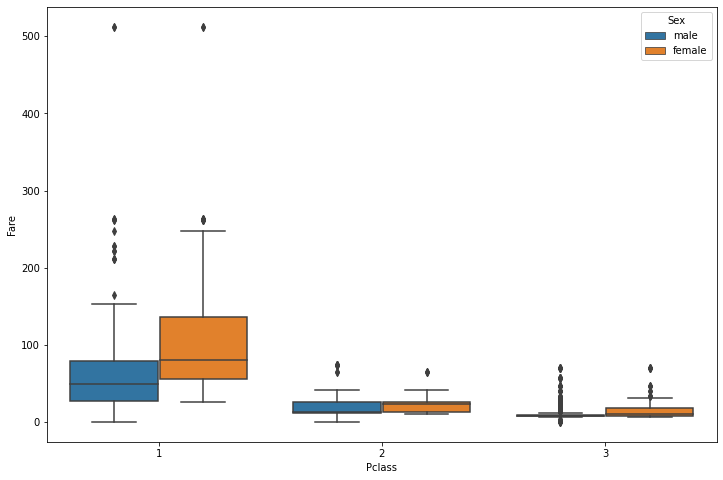

In [21]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df.Pclass,y=df.Fare,hue=df.Sex)

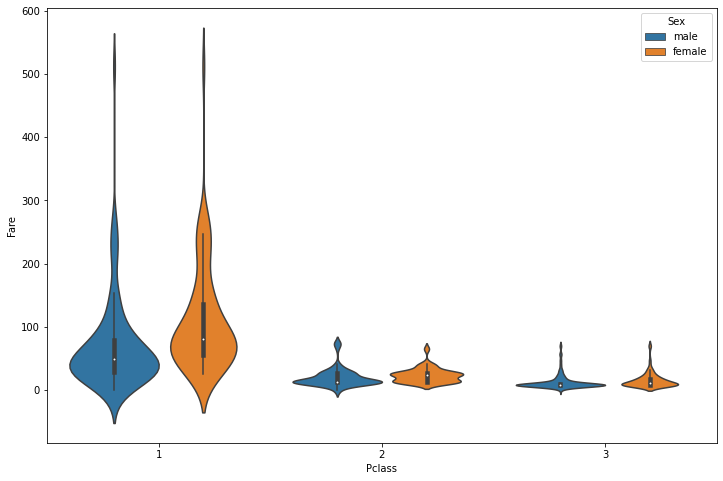

In [22]:
plt.figure(figsize=(12,8))
sns.violinplot(x=df.Pclass,y=df.Fare,hue=df.Sex)

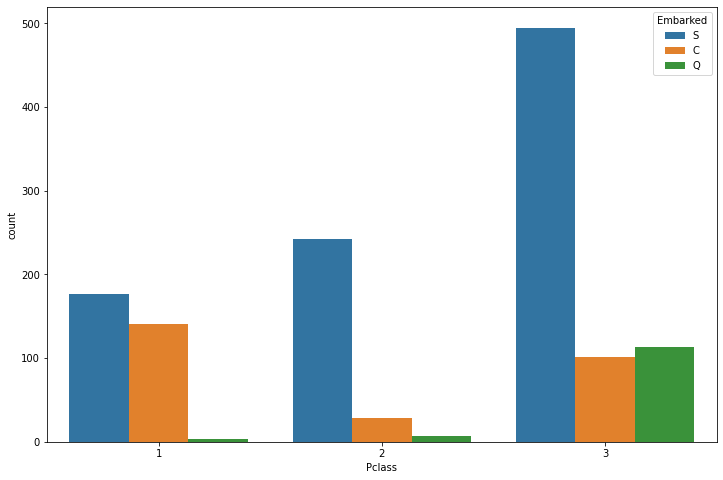

In [23]:
plt.figure(figsize=(12,8))
sns.countplot(x=df.Pclass,hue=df.Embarked)
#same result as Sex

# **`Name`**

In [24]:
df.Name.isna().sum()

0

In [25]:
#map is used as iterable which iterates each item to a transformable function
df.Name.map(lambda x: x.split(',')[0]).value_counts()[:15]
#whos last names are same maybe belongs to same family

Sage         11
Andersson    11
Asplund       8
Goodwin       8
Davies        7
Brown         6
Carter        6
Smith         6
Ford          6
Panula        6
Fortune       6
Skoog         6
Johnson       6
Rice          6
Kelly         5
Name: Name, dtype: int64

# **`Sex`**

In [26]:
df.Sex.isnull().sum()

0

In [27]:
df[df.Sex=='female'].Name.map(lambda x: x.split(',')[1].split('.')[0].strip()).value_counts()
#No wrong lable for female in names

Miss            260
Mrs             197
Ms                2
Mlle              2
Mme               1
Lady              1
Dona              1
the Countess      1
Dr                1
Name: Name, dtype: int64

In [28]:
df[df.Sex=='male'].Name.map(lambda x: x.split(',')[1].split('.')[0].strip()).value_counts()
#No wrong lable for male in names

Mr          757
Master       61
Rev           8
Dr            7
Col           4
Major         2
Don           1
Sir           1
Jonkheer      1
Capt          1
Name: Name, dtype: int64

# **`Age`**

In [29]:
df.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [30]:
df.Age.isnull().sum()

263

In [31]:
df.Age = df.Age.fillna(df.Age.median(),axis=0)
#we can also use mean as both are same because there isnt a outlier

In [32]:
age_bins = pd.cut(df.Age,bins=4)
age_bins

PassengerId
1       (20.128, 40.085]
2       (20.128, 40.085]
3       (20.128, 40.085]
4       (20.128, 40.085]
5       (20.128, 40.085]
              ...       
1305    (20.128, 40.085]
1306    (20.128, 40.085]
1307    (20.128, 40.085]
1308    (20.128, 40.085]
1309    (20.128, 40.085]
Name: Age, Length: 1309, dtype: category
Categories (4, interval[float64]): [(0.0902, 20.128] < (20.128, 40.085] < (40.085, 60.043] <
                                    (60.043, 80.0]]

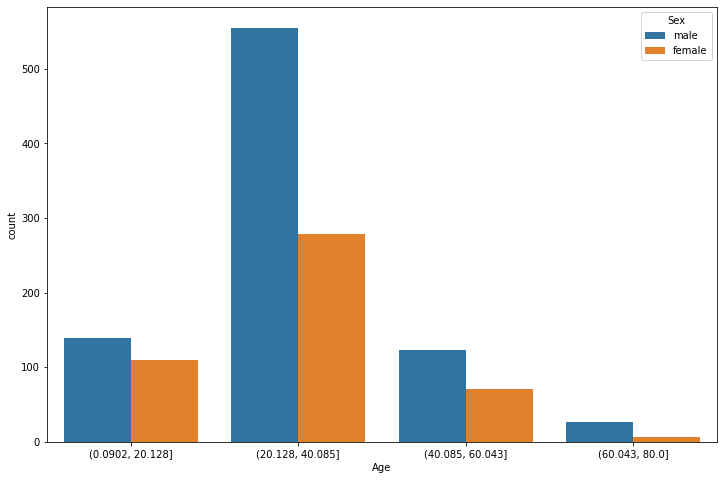

In [33]:
plt.figure(figsize=(12,8))
sns.countplot(x=age_bins,hue=df.Sex)

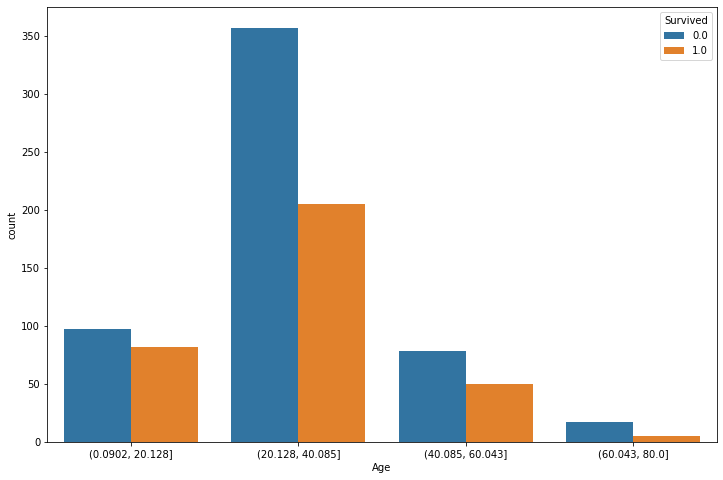

In [34]:
plt.figure(figsize=(12,8))
sns.countplot(x=age_bins,hue=df.Survived)

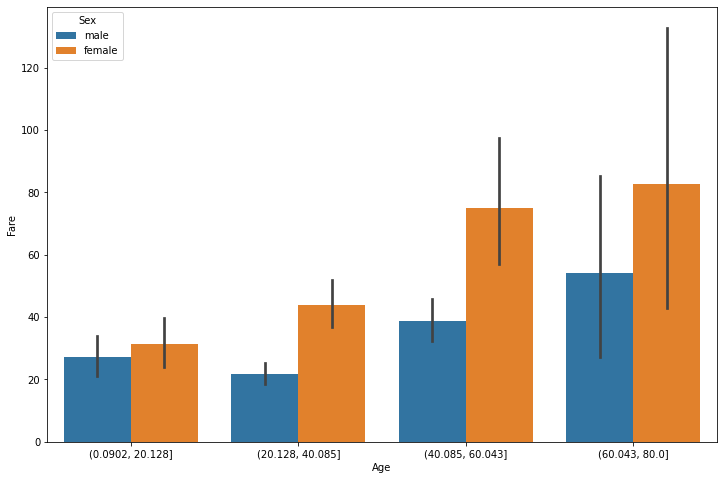

In [35]:
plt.figure(figsize=(12,8))
sns.barplot(x=age_bins,y=df.Fare,hue=df.Sex)
#the fares taken of females are more compared to male

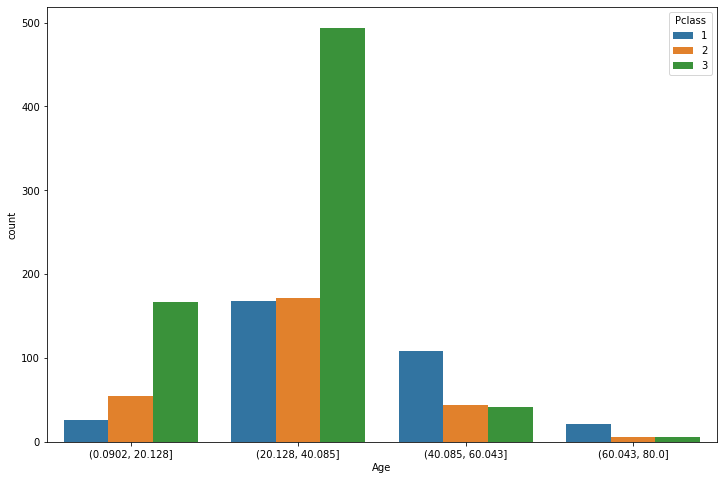

In [36]:
plt.figure(figsize=(12,8))
sns.countplot(x=age_bins,hue=df.Pclass)

# **`Sibsp`**

In [37]:
df.SibSp.value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [38]:
df.SibSp.isnull().sum()

0

In [39]:
df.groupby('SibSp').mean()

,Survived,Pclass,Age,Parch,Fare
SibSp,,,,,
0,0.345395,2.351291,30.246251,0.181818,25.785406
1,0.535885,2.034483,30.684201,0.717868,48.711300
2,0.464286,2.333333,24.202381,0.571429,48.940576
3,0.250000,2.550000,18.650000,1.250000,71.332090
4,0.166667,3.000000,8.772727,1.545455,30.594318
5,0.000000,3.000000,10.166667,2.000000,46.900000
8,0.000000,3.000000,26.500000,2.000000,69.550000


# **`Parch`**

In [40]:
df.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6, 9])

In [41]:
df.Parch.isnull().sum()

0

In [42]:
df.Parch.value_counts()
#if the test set takes sample then all categories cant be seen by the classifier

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

# **`Fare`**

In [43]:
df.Fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [44]:
df.Fare.fillna(df.Fare.mean(),inplace=True,axis=0)
df.Fare.isnull().sum()

0

# **`Cabin`**

In [45]:
df.Cabin.isnull().sum() 

1014

In [46]:
df.drop('Cabin',axis=1,inplace=True)


In [47]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# **`Embarked`**

In [48]:
df.Embarked.isnull().sum()
#fill na values with mode

2

In [49]:
df.Embarked.fillna(value=df.Embarked.mode(),axis=0,inplace=True)


In [50]:
df.Embarked.isnull().sum()
#missing values aint getting filled because of type

2

In [51]:
type(df[df.Embarked.isnull()].Embarked.iloc[0])
#its float!!!

float

In [52]:
df.Embarked = df.Embarked.astype(str)

In [53]:
df.Embarked.replace('nan','S',inplace=True)

In [54]:
df.Embarked.isnull().sum()
#worked

0

In [55]:
df.iloc[829]

Survived                                            1
Pclass                                              1
Name        Stone, Mrs. George Nelson (Martha Evelyn)
Sex                                            female
Age                                                62
SibSp                                               0
Parch                                               0
Ticket                                         113572
Fare                                               80
Embarked                                            S
Name: 830, dtype: object

# ***`Feature Engineering`***

In [56]:
df['Title'] = df.Name.map(lambda x: x.split(',')[1].split('.')[0].strip())

In [57]:
df['Title'].value_counts()
#Mr , miss, mrs, master, dr are frequent

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Major             2
Mlle              2
Capt              1
the Countess      1
Don               1
Jonkheer          1
Sir               1
Lady              1
Dona              1
Mme               1
Name: Title, dtype: int64

In [58]:
#lets check for other titles that they are male or female
df[df.Title == 'Rev'] # male
df[df.Title == 'Col'] # male
df[df.Title == 'Ms'] # female
df[df.Title == 'Mlle'] # female
df[df.Title == 'Major'] # male
df[df.Title == 'Capt'] # male
df[df.Title == 'Don'] # male
df[df.Title == 'Jonkheer'] # male
df[df.Title == 'Mme'] # female
df[df.Title == 'the Countess'] # female
df[df.Title == 'Lady'] # female
df[df.Title == 'Sir'] # male
df[df.Title == 'Dona'] # female

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
PassengerId,,,,,,,,,,,
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C,Dona


In [59]:
df.Title = df.Title.replace(['Rev','Col','Major','Capt','Don','Jonkheer','Sir'],'Mr')
df.Title = df.Title.replace(['Ms','Mlle','Mme'],'Miss')
df.Title = df.Title.replace(['Dona','Lady','the Countess'],'Mrs')

In [60]:
df.Title.value_counts()

Mr        775
Miss      265
Mrs       200
Master     61
Dr          8
Name: Title, dtype: int64

In [61]:
def title_no(x):
    if x == 'Mr':
        return 0
    elif x == 'Miss':
        return 1
    elif x == 'Mrs':
        return 2
    elif x == 'Master':
        return 3
    elif x == 'Dr':
        return 4

In [62]:
df.Title = df.Title.map(lambda x: title_no(x))

In [63]:
df.Title

PassengerId
1       0
2       2
3       1
4       2
5       0
       ..
1305    0
1306    2
1307    0
1308    0
1309    3
Name: Title, Length: 1309, dtype: int64

In [64]:
def Embark(x):
    if x == 'S':
        return 0
    elif x == 'C':
        return 1
    elif x == 'Q':
        return 2

In [65]:
df.Embarked = df.Embarked.map(lambda x:Embark(x))

In [66]:
#dropping name and ticket
df.drop(columns=['Name','Ticket'],axis=1,inplace=True)

In [67]:
dfs = pd.get_dummies(df['Sex'])

In [68]:
final_df = pd.concat([df,dfs],axis=1)

In [69]:
final_df.drop('Sex',axis=1,inplace=True)

In [70]:
final_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,female,male
PassengerId,,,,,,,,,,
1,0.0,3,22.0,1,0,7.2500,0,0,0,1
2,1.0,1,38.0,1,0,71.2833,1,2,1,0
3,1.0,3,26.0,0,0,7.9250,0,1,1,0
4,1.0,1,35.0,1,0,53.1000,0,2,1,0
5,0.0,3,35.0,0,0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,28.0,0,0,8.0500,0,0,0,1
1306,NaN,1,39.0,0,0,108.9000,1,2,1,0
1307,NaN,3,38.5,0,0,7.2500,0,0,0,1


          Survived    Pclass       Age  ...     Title    female      male
Survived  1.000000 -0.338481 -0.064910  ...  0.465070  0.543351 -0.543351
Pclass   -0.338481  1.000000 -0.377908  ... -0.102647 -0.124617  0.124617
Age      -0.064910 -0.377908  1.000000  ... -0.167807 -0.053663  0.053663
SibSp    -0.035322  0.060832 -0.189972  ...  0.306007  0.109609 -0.109609
Parch     0.081629  0.018322 -0.125851  ...  0.354295  0.213125 -0.213125
Fare      0.257307 -0.558477  0.178860  ...  0.168458  0.185484 -0.185484
Embarked  0.106811  0.038875  0.018654  ...  0.042550  0.120423 -0.120423
Title     0.465070 -0.102647 -0.167807  ...  1.000000  0.605410 -0.605410
female    0.543351 -0.124617 -0.053663  ...  0.605410  1.000000 -1.000000
male     -0.543351  0.124617  0.053663  ... -0.605410 -1.000000  1.000000

[10 rows x 10 columns]


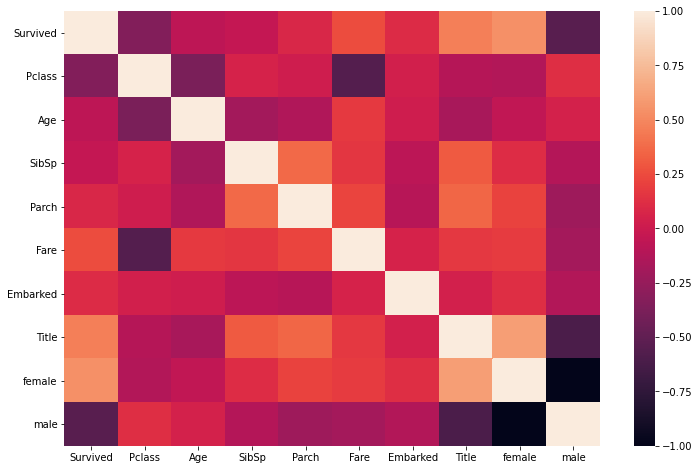

In [71]:
plt.figure(figsize=(12,8))
sns.heatmap(final_df.corr())
print(final_df.corr())

# **`Feature Scaling`**

In [72]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
scalar_fits = scalar.fit(final_df[['Fare','Age']].values)
final_df[['Fare','Age']]= scalar.fit_transform(final_df[['Fare','Age']].values)

In [73]:
final_df[['Fare','Age']].values

array([[0.01415106, 0.27345609],
       [0.13913574, 0.473882  ],
       [0.01546857, 0.32356257],
       ...,
       [0.01415106, 0.48014531],
       [0.01571255, 0.34861581],
       [0.0436405 , 0.34861581]])

In [74]:
final_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,female,male
PassengerId,,,,,,,,,,
1,0.0,3,0.273456,1,0,0.014151,0,0,0,1
2,1.0,1,0.473882,1,0,0.139136,1,2,1,0
3,1.0,3,0.323563,0,0,0.015469,0,1,1,0
4,1.0,1,0.436302,1,0,0.103644,0,2,1,0
5,0.0,3,0.436302,0,0,0.015713,0,0,0,1


# **`Model Build`**

In [75]:
#split train test
test = final_df[891:]

In [76]:
test.drop(['Survived'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [77]:
train = final_df.iloc[:891]
train = train.astype(float)


In [78]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,female,male
PassengerId,,,,,,,,,,
1,0.0,3.0,0.273456,1.0,0.0,0.014151,0.0,0.0,0.0,1.0
2,1.0,1.0,0.473882,1.0,0.0,0.139136,1.0,2.0,1.0,0.0
3,1.0,3.0,0.323563,0.0,0.0,0.015469,0.0,1.0,1.0,0.0
4,1.0,1.0,0.436302,1.0,0.0,0.103644,0.0,2.0,1.0,0.0
5,0.0,3.0,0.436302,0.0,0.0,0.015713,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
887,0.0,2.0,0.336089,0.0,0.0,0.025374,0.0,0.0,0.0,1.0
888,1.0,1.0,0.235876,0.0,0.0,0.058556,0.0,1.0,1.0,0.0
889,0.0,3.0,0.348616,1.0,2.0,0.045771,0.0,1.0,1.0,0.0


In [79]:
#removing sibsp parch and female as they are correlating each other
train.drop(columns=['SibSp','Parch','female'],axis=1,inplace=True)
test.drop(columns=['SibSp','Parch','female'],axis=1,inplace=True)
y = train.pop('Survived')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [80]:
train

,Pclass,Age,Fare,Embarked,Title,male
PassengerId,,,,,,
1,3.0,0.273456,0.014151,0.0,0.0,1.0
2,1.0,0.473882,0.139136,1.0,2.0,0.0
3,3.0,0.323563,0.015469,0.0,1.0,0.0
4,1.0,0.436302,0.103644,0.0,2.0,0.0
5,3.0,0.436302,0.015713,0.0,0.0,1.0
...,...,...,...,...,...,...
887,2.0,0.336089,0.025374,0.0,0.0,1.0
888,1.0,0.235876,0.058556,0.0,1.0,0.0
889,3.0,0.348616,0.045771,0.0,1.0,0.0


In [81]:
pip install scikit-learn==0.24.1

In [82]:
pip install delayed

In [83]:
from sklearn.naive_bayes import GaussianNB
#from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
gnb = GaussianNB()
"""dtc = DecisionTreeClassifier()"""
knn = KNeighborsClassifier(n_neighbors=10)
log = LogisticRegression(C=10)
#dtc.fit(train,y)
log.fit(train,y)
knn.fit(train,y)
gnb.fit(train,y)

GaussianNB()

In [84]:
#predicting new data
prediction = pd.DataFrame(data = log.predict(test),index=test.index)

In [85]:
from sklearn.metrics import accuracy_score

In [86]:
print("Logistic:" , accuracy_score(y,log.predict(train)))
print("Knn:", accuracy_score(y,knn.predict(train)))
print("Gaussian:", accuracy_score(y,gnb.predict(train)))
#print("Decision Tree Classifier:", accuracy_score(y,dtc.predict(train)))

Logistic: 0.8058361391694725
Knn: 0.8294051627384961
Gaussian: 0.7845117845117845


# ***`Hyperparameter tunning`***

In [87]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)

In [108]:
from sklearn.model_selection import GridSearchCV
#for knn
param_grid = {'n_neighbors':np.arange(1,100)}
knn_cv = GridSearchCV(knn,param_grid,cv=cv_method)
knn_cv.fit(train,y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=KNeighborsClassifier(n_neighbors=10),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [110]:
knn_cv.best_score_

0.8178206013432928

In [90]:
#for logistic
c_space = np.logspace(-5,8,15)
param_grid_log = {'C': c_space}
log_cv = GridSearchCV(log,param_grid_log,cv=cv_method)
log_cv.fit(train,y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=LogisticRegression(C=10),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [91]:
#accuracy increased
log_cv.best_score_

0.8103404264222793

In [92]:
#gaussian
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gnb_cv = GridSearchCV(estimator=gnb, param_grid=params_NB, cv=cv_method,verbose=1,scoring='accuracy')
gnb_cv.fit(train,y)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [93]:
#increased 3%
gnb_cv.best_score_

0.8110873977360701

In [94]:
"""from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(train,y)"""

'from sklearn.ensemble import RandomForestClassifier\nrfc=RandomForestClassifier()\nrfc.fit(train,y)'

In [95]:
#using randomizedsearchCV for descisiontree
"""from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
param_dist = {"max_depth":[3,None],
              "max_features": [0.1, 0.2, 0.3, 0.4, 0.5],
              "min_samples_leaf":randint(1,9),
              "criterion":["gini","entropy"]}
dtc_cv = RandomizedSearchCV(dtc,param_dist,cv=5)
dtc_cv.fit(train,y)"""

'from scipy.stats import randint\nfrom sklearn.model_selection import RandomizedSearchCV\nparam_dist = {"max_depth":[3,None],\n              "max_features": [0.1, 0.2, 0.3, 0.4, 0.5],\n              "min_samples_leaf":randint(1,9),\n              "criterion":["gini","entropy"]}\ndtc_cv = RandomizedSearchCV(dtc,param_dist,cv=5)\ndtc_cv.fit(train,y)'

# ***loading ML model***

In [96]:
prediction.rename({0:'Survived'}, axis=1,inplace=True)

In [97]:
prediction.to_csv('submit.csv',index='False')

In [98]:
from joblib import dump,load
dump(log_cv,'log_model.joblib')

['log_model.joblib']

In [99]:
dump(scalar_fits,'scalar.joblib')

['scalar.joblib']

In [100]:
load('log_model.joblib')

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=LogisticRegression(C=10),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [101]:
def inputs_to_datatypes(inputs_str):
    def isfloat(s):
        try:
            float(s)
            return True
        except:
            return False
    arr = np.array([float(x) for x in inputs_str.split(',') if isfloat(x)])
    return arr.reshape(1,-1)


In [102]:
p=inputs_to_datatypes("1,12,20,1,2,1")

In [103]:
a = np.array(["1,12,20,1,2,1"]).reshape(1,-1)

In [104]:
train.values

array([[3.        , 0.27345609, 0.01415106, 0.        , 0.        ,
        1.        ],
       [1.        , 0.473882  , 0.13913574, 1.        , 2.        ,
        0.        ],
       [3.        , 0.32356257, 0.01546857, 0.        , 1.        ,
        0.        ],
       ...,
       [3.        , 0.34861581, 0.04577135, 0.        , 1.        ,
        0.        ],
       [1.        , 0.32356257, 0.0585561 , 1.        , 0.        ,
        1.        ],
       [3.        , 0.39872228, 0.01512699, 2.        , 0.        ,
        1.        ]])

In [105]:
print(log.predict(p))

[0.]


In [106]:
a.reshape(len(a),1)

array([['1,12,20,1,2,1']], dtype='<U13')

In [107]:
np.logspace(-5,8,15)


array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])